# `Ames Housing Price Prediction`

## `Project Introduction`

The Ames Housing dataset contains detailed records of residential homes in **Ames, Iowa**, collected between 2006 and 2010. With 80+ features describing each house's physical and categorical characteristics, this dataset provides a rich foundation for practicing data preprocessing, feature engineering, and machine learning modeling techniques.

This project aims to build a **predictive model** that can accurately estimate house prices based on available property attributes. It serves as a practical application of regression techniques, EDA, and model evaluation.

---

## `Project Goal`

- To **predict the final sale price** of homes in Ames using machine learning.
- To perform **comprehensive EDA** (Exploratory Data Analysis) and understand the relationships between features and target variable.
- To apply **data preprocessing techniques** such as handling missing values, encoding categorical variables, and feature selection.
- To compare different regression models (e.g., Linear Regression, Random Forest, Gradient Boosting) using metrics like **R²**, **RMSE**, and **MAE**.
- To ensure the model **generalizes well** to unseen data and avoids overfitting.

---

## `Dataset`

- **Source**: Ames, Iowa Housing Dataset
- **Rows**: 1,460
- **Features**: 80 (excluding target)
- **Target**: `SalePrice` (continuous numeric value)

---


In [590]:
import numpy as np
import pandas as pd

# `Load the dataset`

In [591]:
df = pd.read_csv('data/train.csv')

# `Visualize the dataset`

In [592]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# `Shape of the DataFrame`

In [593]:
df.shape

(1460, 81)

# `Investigate the null values in the dataset`

In [594]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# `Plot the count of null values`

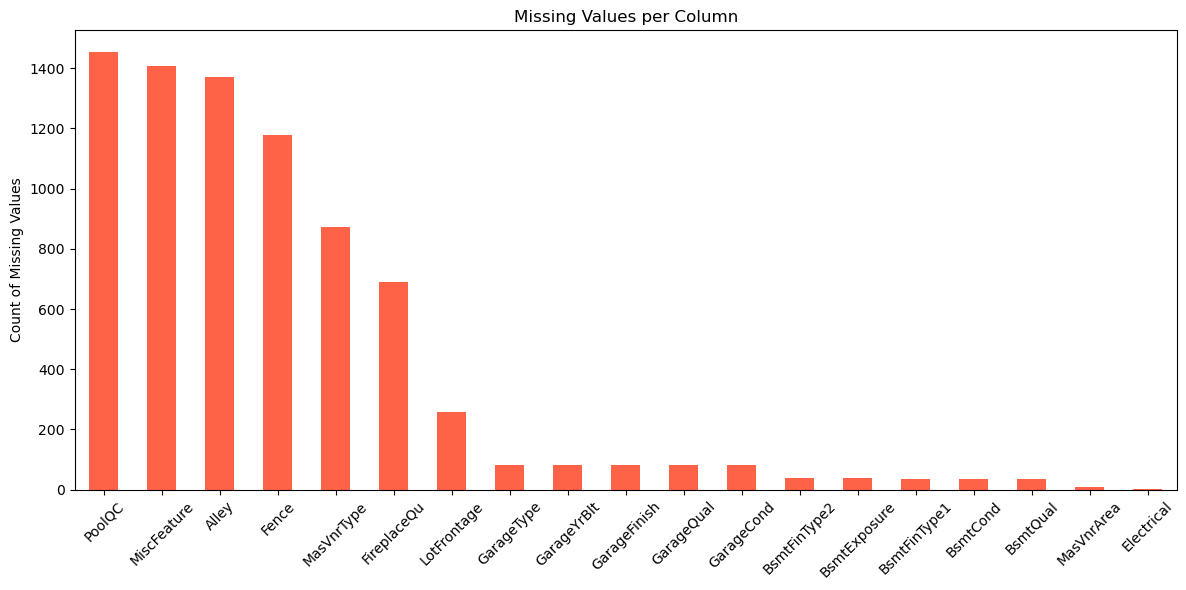

In [595]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
missing.plot(kind='bar', color='tomato')
plt.title("Missing Values per Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# `Dropping the columns having many null values`

In [596]:
for col in df.columns:
    if(df[col].isnull().sum()>500):
        print(f"Column '{col}' has {df[col].isnull().sum()} missing values, dropping it.")

Column 'Alley' has 1369 missing values, dropping it.
Column 'MasVnrType' has 872 missing values, dropping it.
Column 'FireplaceQu' has 690 missing values, dropping it.
Column 'PoolQC' has 1453 missing values, dropping it.
Column 'Fence' has 1179 missing values, dropping it.
Column 'MiscFeature' has 1406 missing values, dropping it.


In [597]:
df.drop(columns=['Id','PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'], inplace=True)

In [598]:
df.shape

(1460, 74)

# `Investigate the datatypes of various cols in the dataset`

In [599]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 74, dtype: object

# `Extacting numerical and categorical columns`

In [600]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

In [601]:
numerical_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [602]:
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

# `Univariate Analysis`

## `Numerical columns`

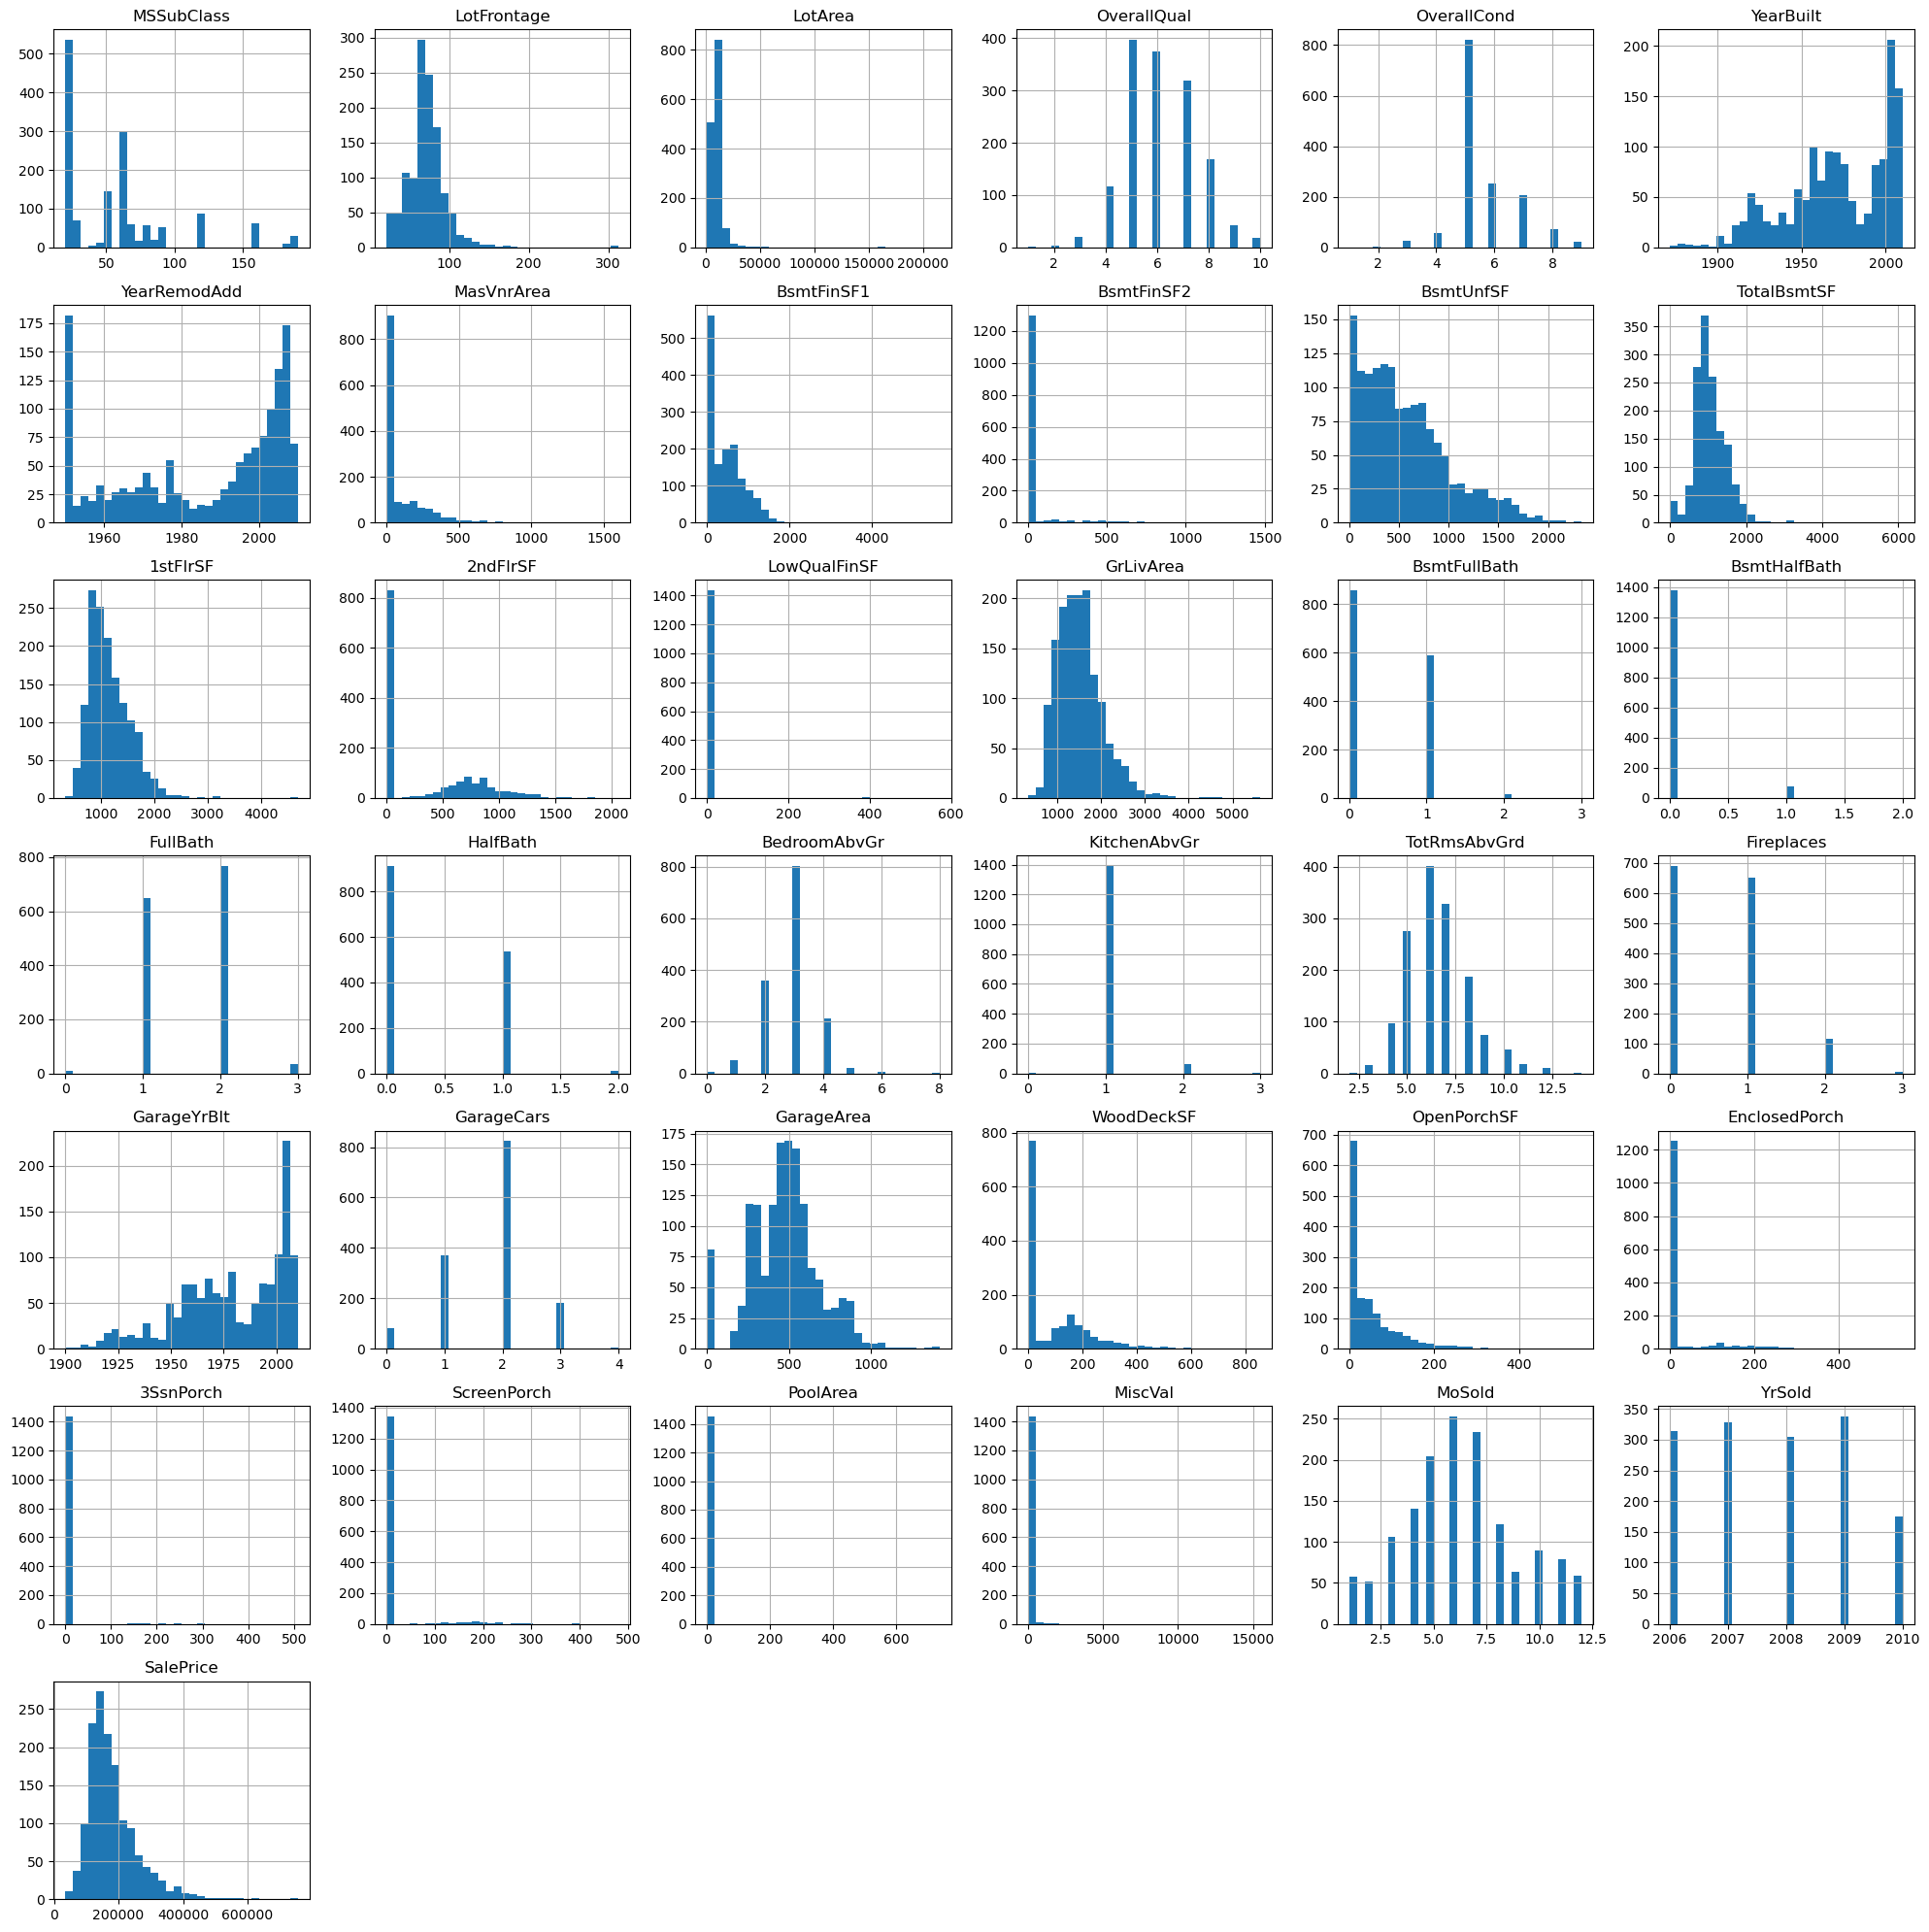

In [603]:
import seaborn as sns
import matplotlib.pyplot as plt

# For numerical
df[numerical_cols].hist(bins=30, figsize=(20, 20))
plt.tight_layout()




# `Categorical Columns`

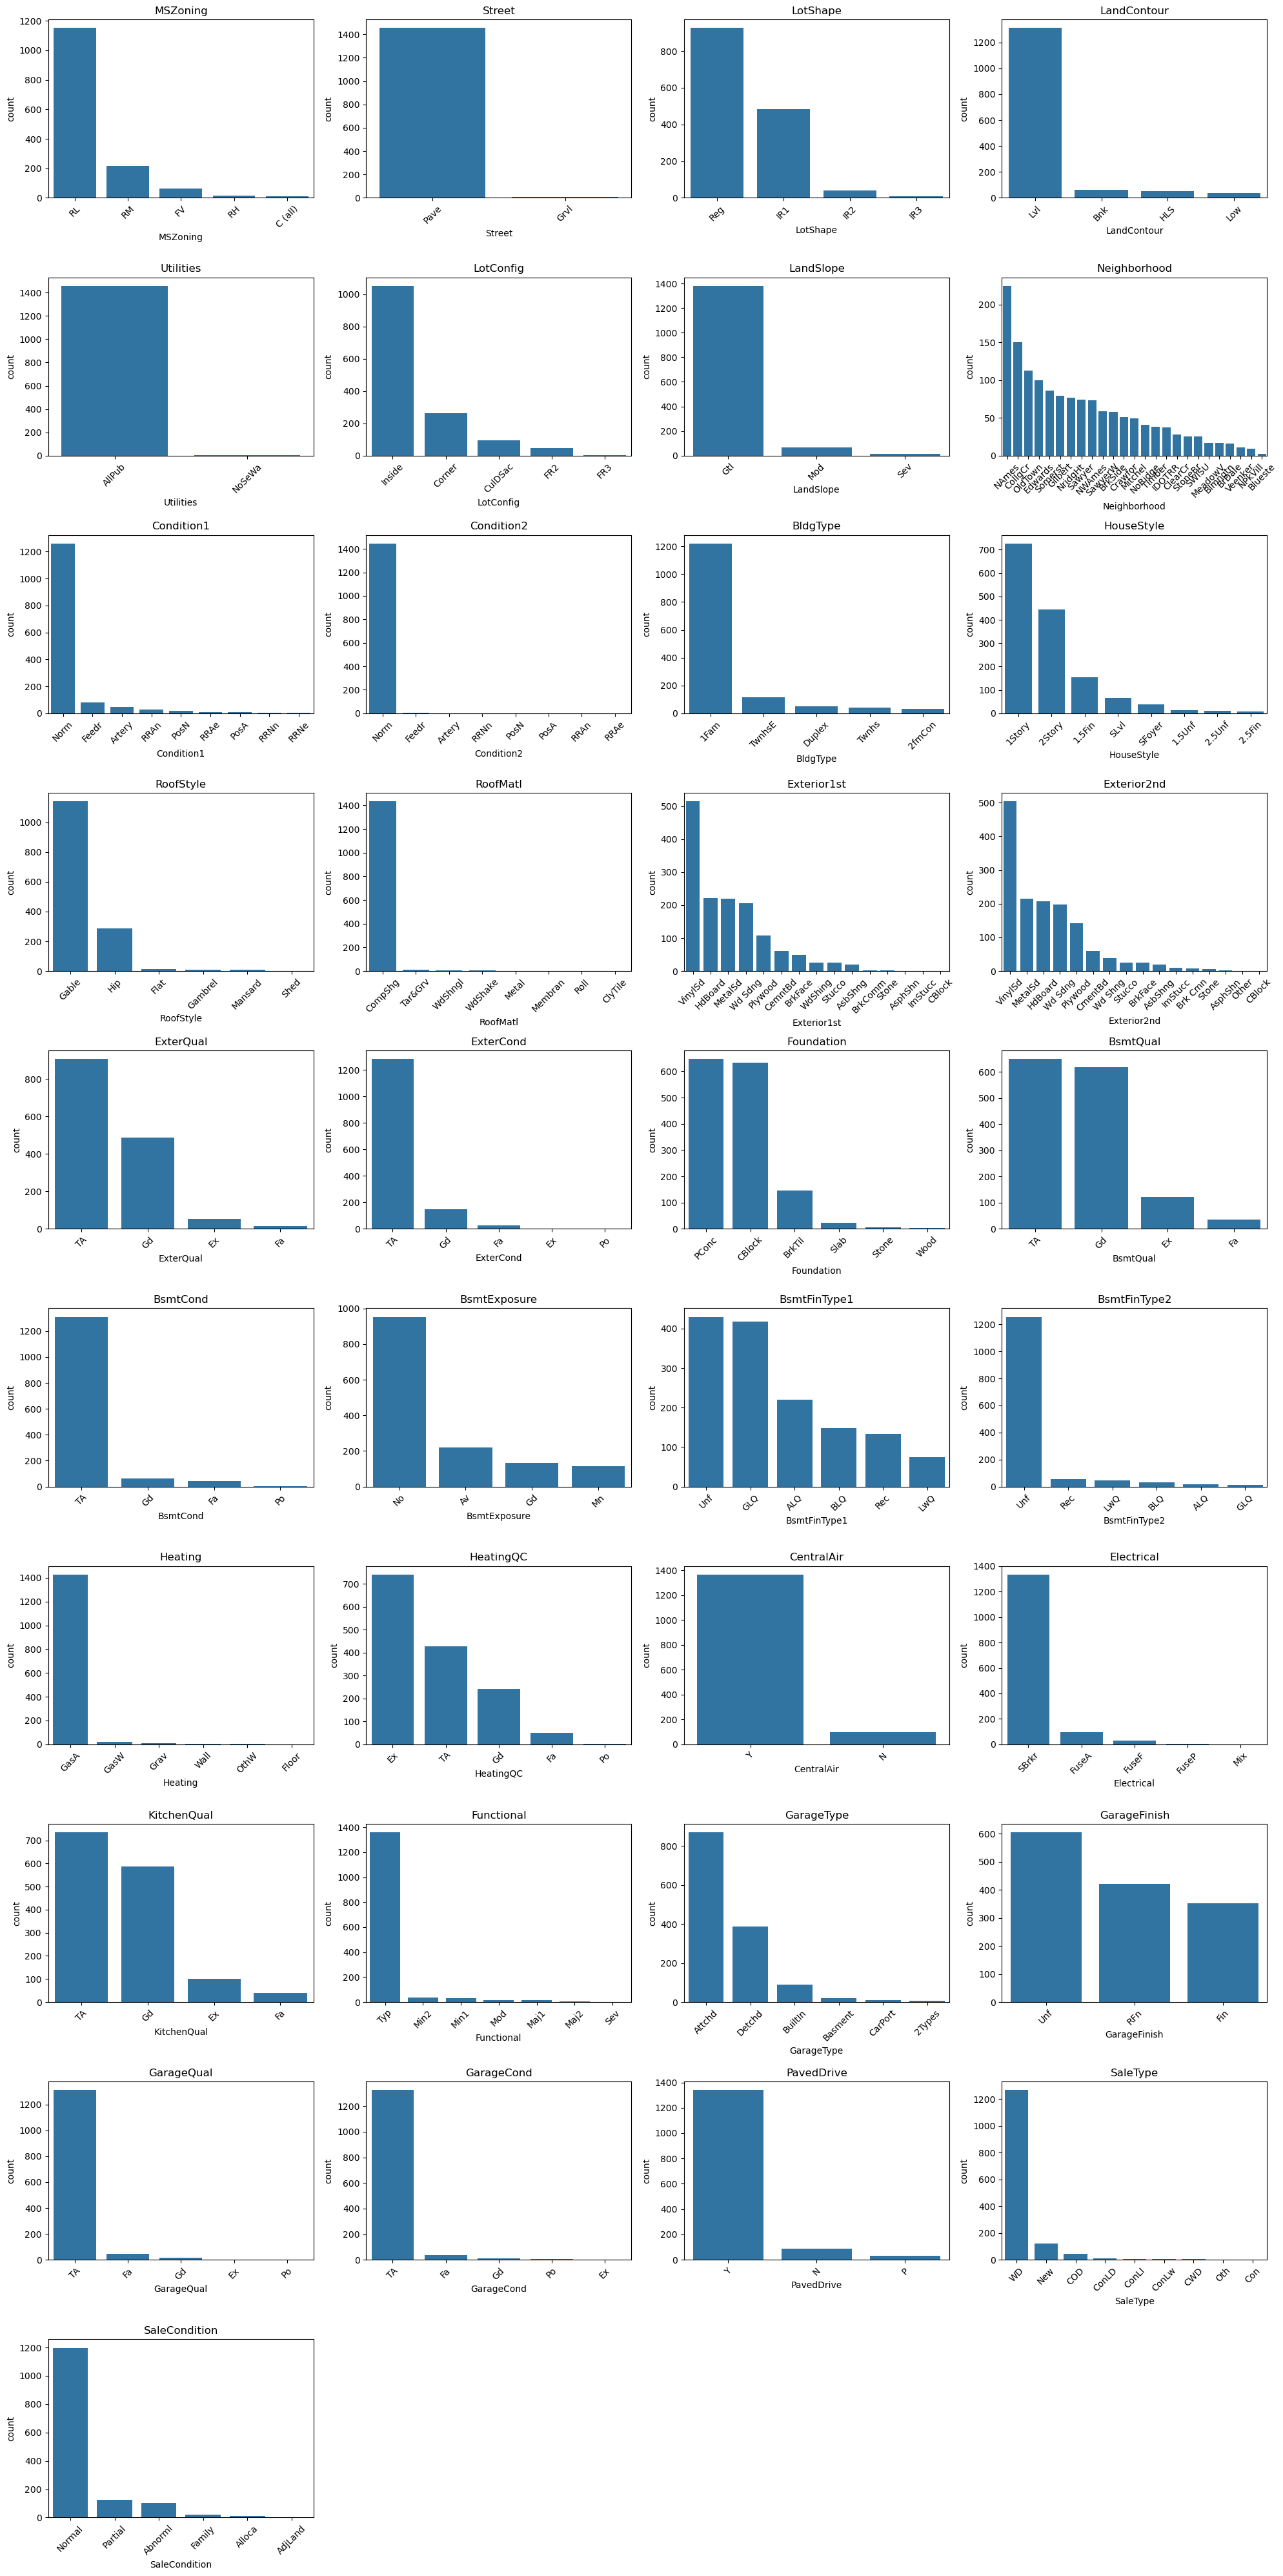

In [604]:
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# `Removing colums having with 90 percent or more mode values`

In [605]:
threshold = 0.9  # 90% threshold
high_mode_cols = []

for col in df.columns:
    mode_freq = df[col].value_counts(normalize=True, dropna=False).values[0]
    if mode_freq >= threshold:
        high_mode_cols.append(col)

print("Columns with >= 90% mode values:")
print(high_mode_cols)


Columns with >= 90% mode values:
['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [606]:
len(high_mode_cols)

18

In [607]:
df.drop(columns=high_mode_cols, inplace=True)

In [608]:
df.shape

(1460, 56)

In [609]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  Neighborhood Condition1 BldgType HouseStyle  OverallQual  OverallCond  \
0      CollgCr       Norm     1Fam     2Story            7            5   
1      Veenker      Feedr     1Fam     1Story            6            8   
2      CollgCr       Norm     1Fam     2Story            7            5   
3      Crawfor       Norm     1Fam     2Story            7            5   
4      NoRidge       Norm     1Fam     2Story            8            5   

   YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  MasVnrArea  \
0       2003          2003     Gable     VinylSd     VinylSd       196.0   
1       1976          1976     Gable     MetalSd     MetalSd         0.0   
2       2001          2002     Gable     VinylSd     VinylSd       162.0   
3       1915          1970     Gable     Wd Sdng     Wd Shng         0.0   
4       2000          2000     Gable     VinylSd     VinylSd       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF HeatingQC  \
0         706          Unf           0        150          856        Ex   
1         978          Unf           0        284         1262        Ex   
2         486          Unf           0        434          920        Ex   
3         216          Unf           0        540          756        Gd   
4         655          Unf           0        490         1145        Ex   

   1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0       856       854       1710             1         2         1   
1      1262         0       1262             0         2         0   
2       920       866       1786             1         2         1   
3       961       756       1717             1         1         0   
4      1145      1053       2198             1         2         1   

   BedroomAbvGr KitchenQual  TotRmsAbvGrd  Fireplaces GarageType  GarageYrBlt  \
0             3          Gd             8           0     Attchd       2003.0   
1             3          TA             6           1     Attchd       1976.0   
2             3          Gd             6           1     Attchd       2001.0   
3             3          Gd             7           1     Detchd       1998.0   
4             4          Gd             9           1     Attchd       2000.0   

  GarageFinish  GarageCars  GarageArea GarageQual  WoodDeckSF  OpenPorchSF  \
0          RFn           2         548         TA           0           61   
1          RFn           2         460         TA         298            0   
2          RFn           2         608         TA           0           42   
3          Unf           3         642         TA           0           35   
4          RFn           3         836         TA         192           84   

   EnclosedPorch  MoSold  YrSold SaleType SaleCondition  SalePrice  
0              0       2    2008       WD        Normal     208500  
1              0       5    2007       WD        Normal     181500  
2              0       9    2008       WD        Normal     223500  
3            272       2    2

In [610]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# `Bivariate Analysis`

## `Numerical features vs SalePrice`

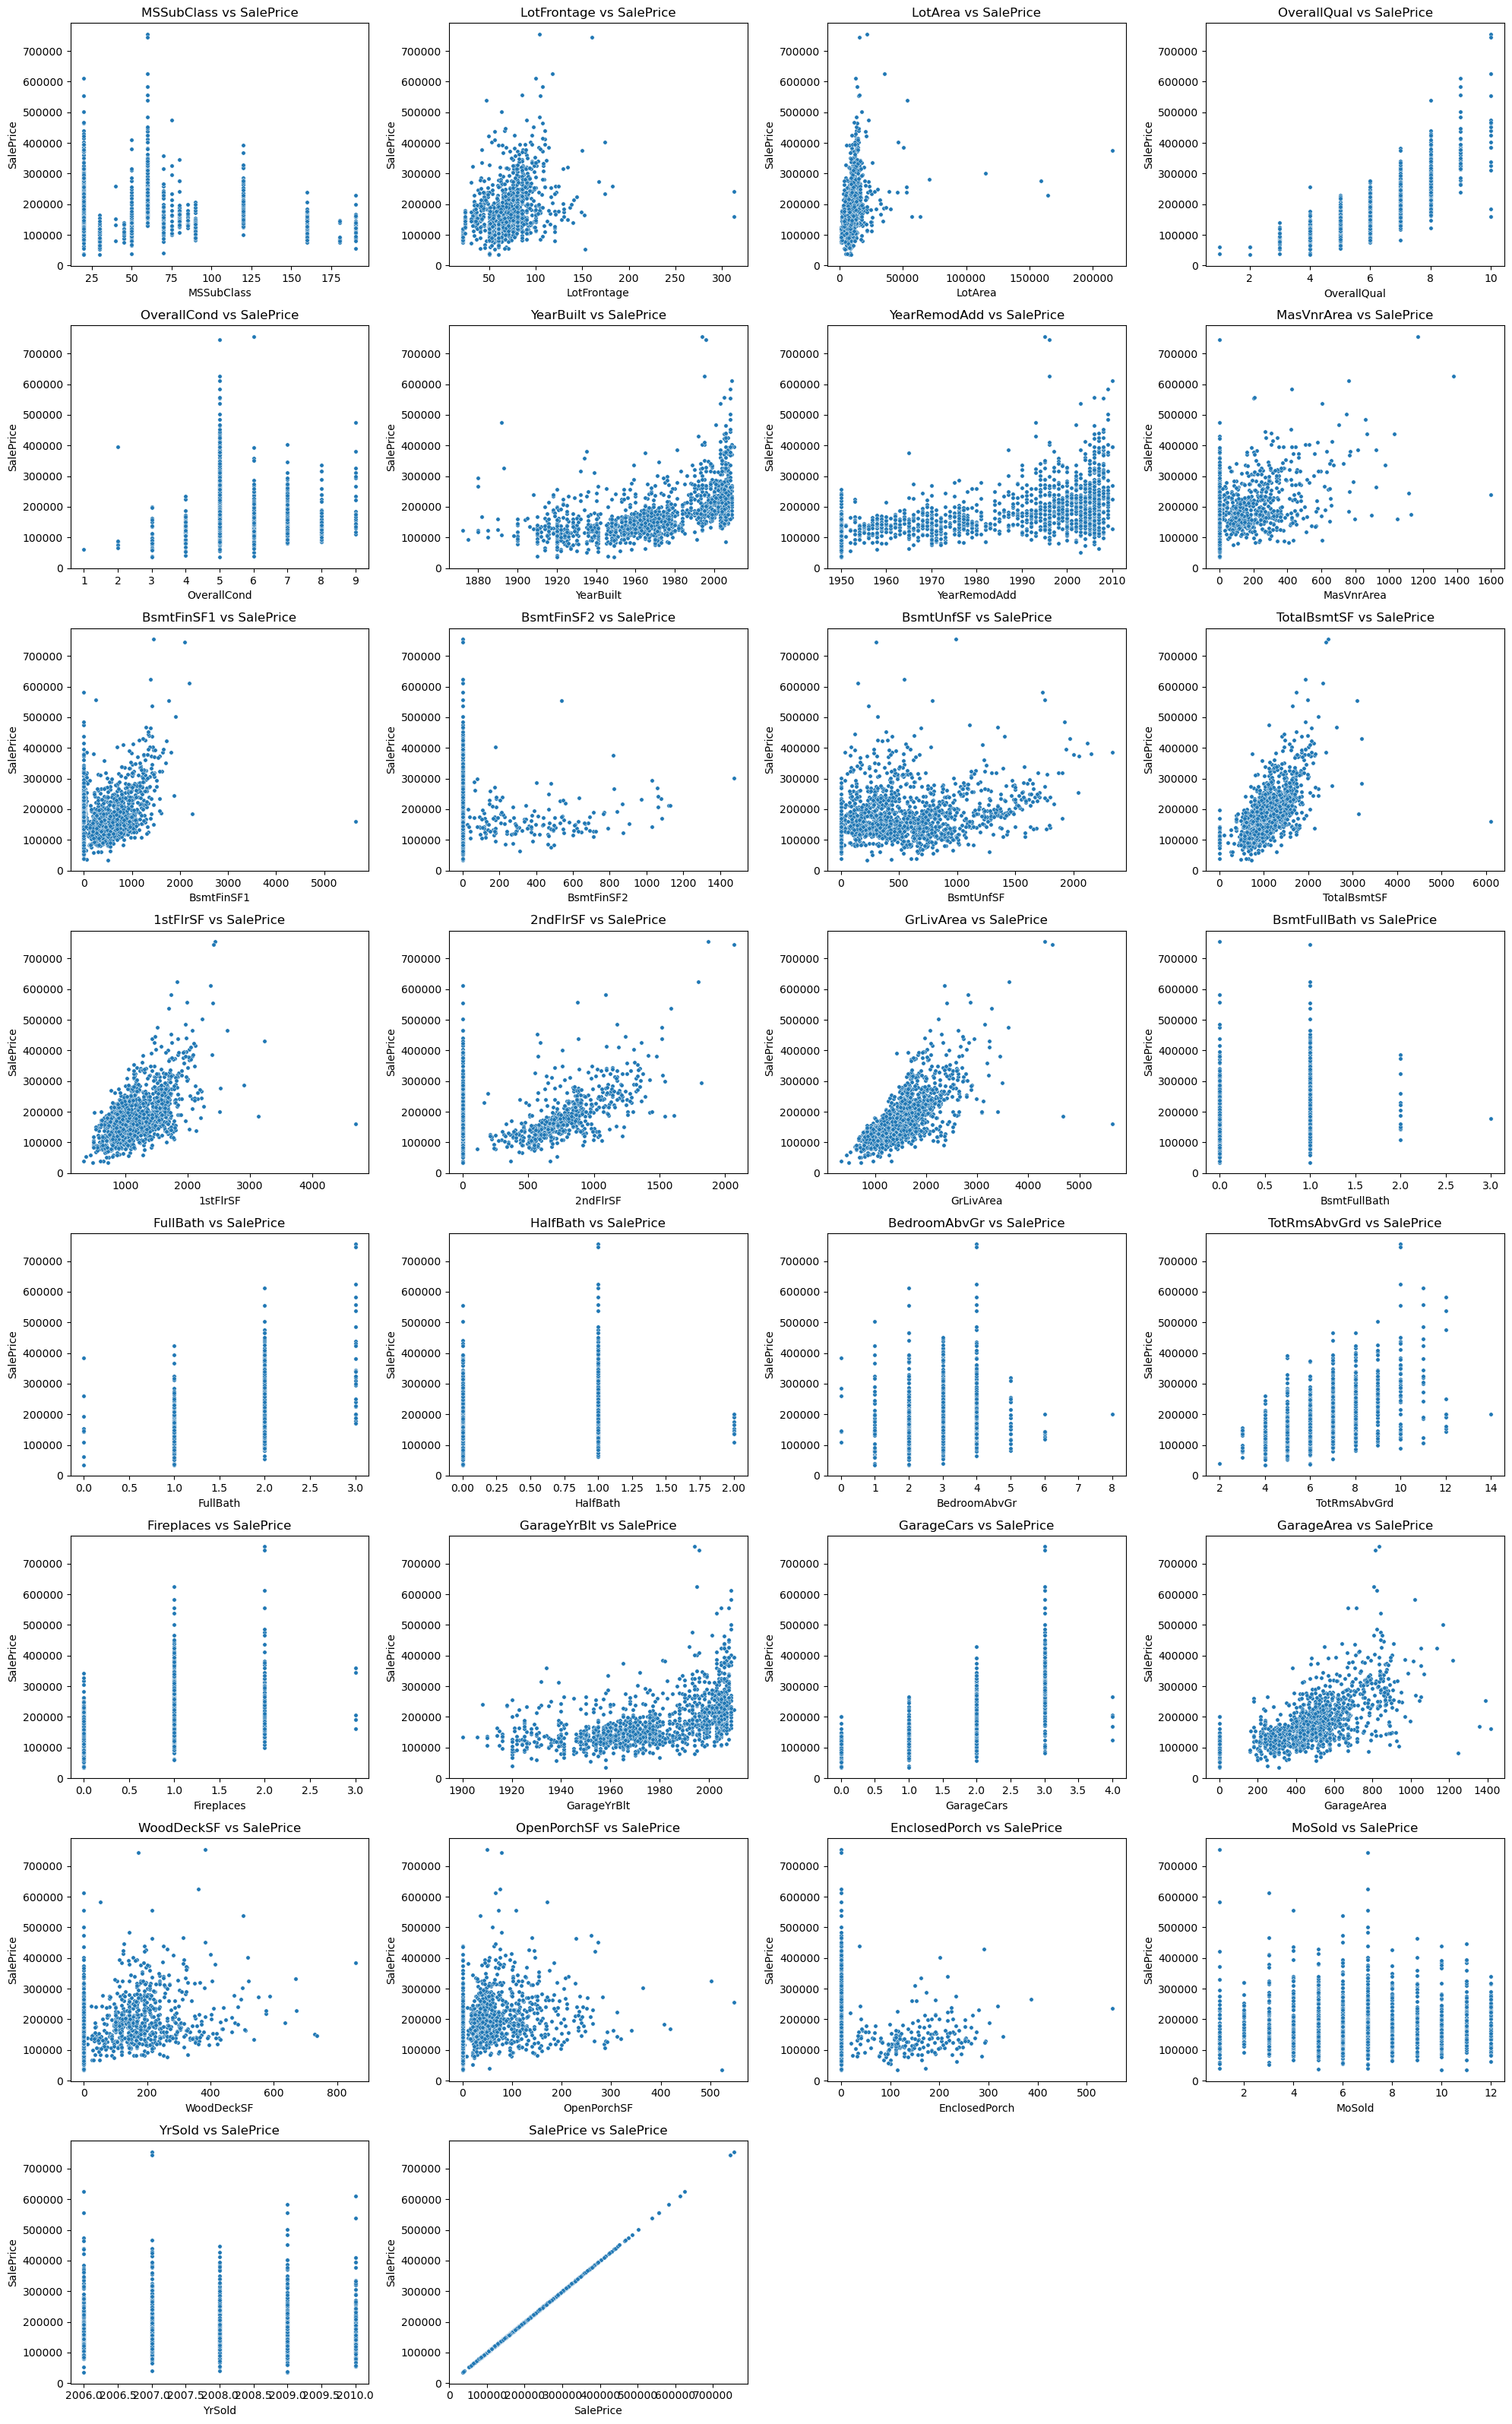

In [611]:
import math
# Grid size
n_cols = 4  # number of columns in grid
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Plotting
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.scatterplot(x=col, y='SalePrice', data=df, s=15)
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

## `Categorical features vs SalePrice`

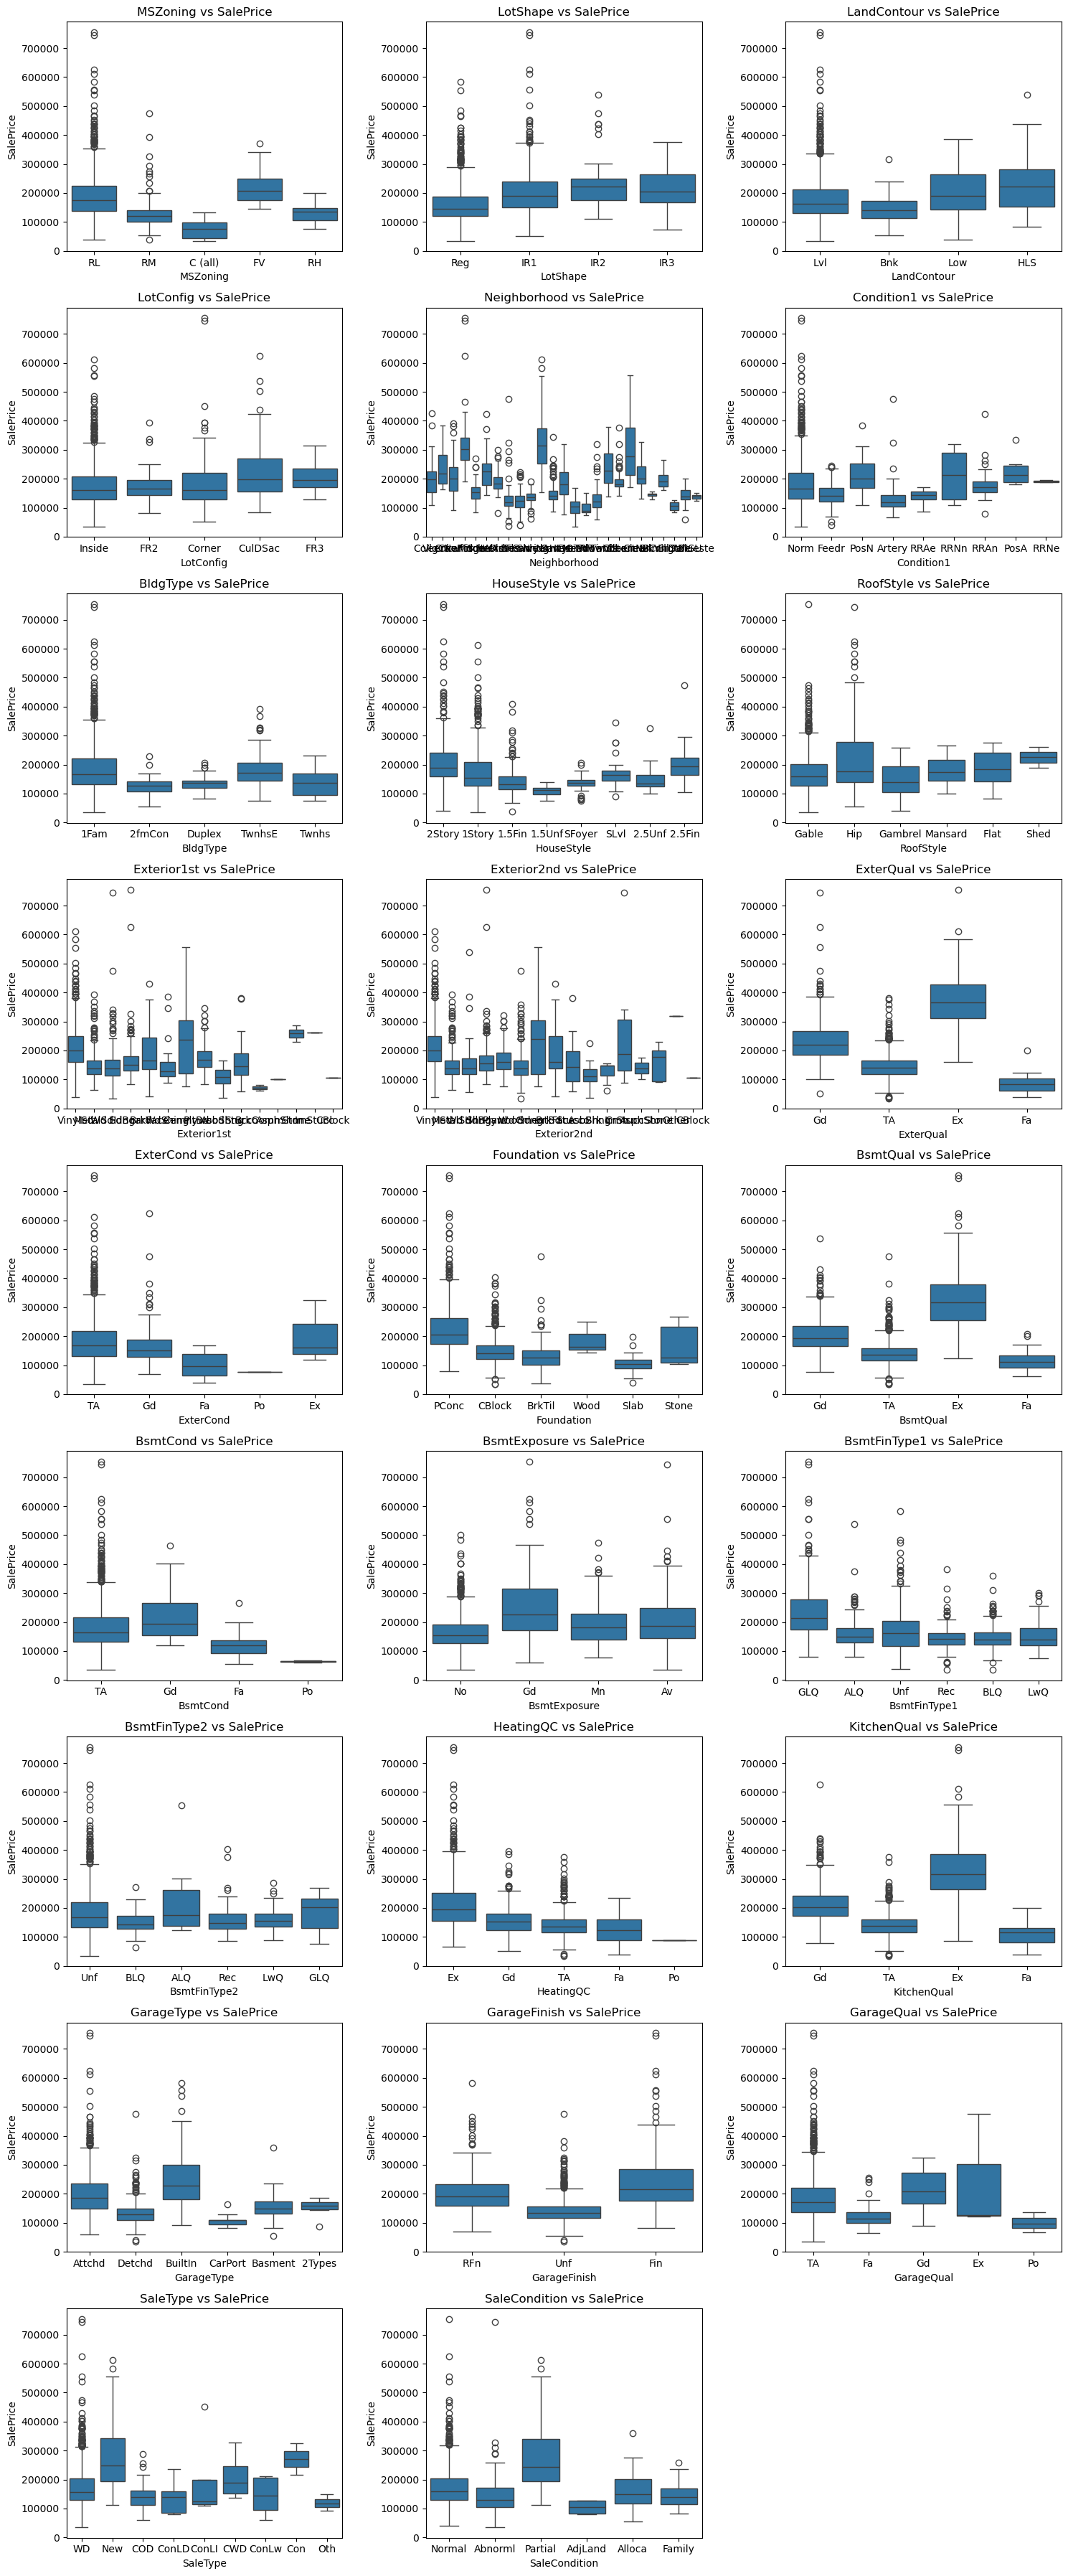

In [612]:
import math
# Grid size
n_cols = 3  # number of columns in grid
n_rows = math.ceil(len(categorical_cols) / n_cols)

# Plotting
plt.figure(figsize=(n_cols * 5, n_rows * 4))
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(x=col, y='SalePrice', data=df)
    plt.title(f'{col} vs SalePrice')
    plt.xlabel(col)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

# `Ordinal features`

In [613]:
ord_cols = df[categorical_cols].nunique()<=5
ordinal_cols = ord_cols[ord_cols==True].index.tolist()
ordinal_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'BldgType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'GarageFinish',
 'GarageQual']

# `OneHot features`

In [614]:
ohe_cols = df[categorical_cols].nunique()>5
ohe_cols = ohe_cols[ohe_cols==True].index.tolist()
ohe_cols

['Neighborhood',
 'Condition1',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'SaleType',
 'SaleCondition']

## `Correlation matrix of numerical features`

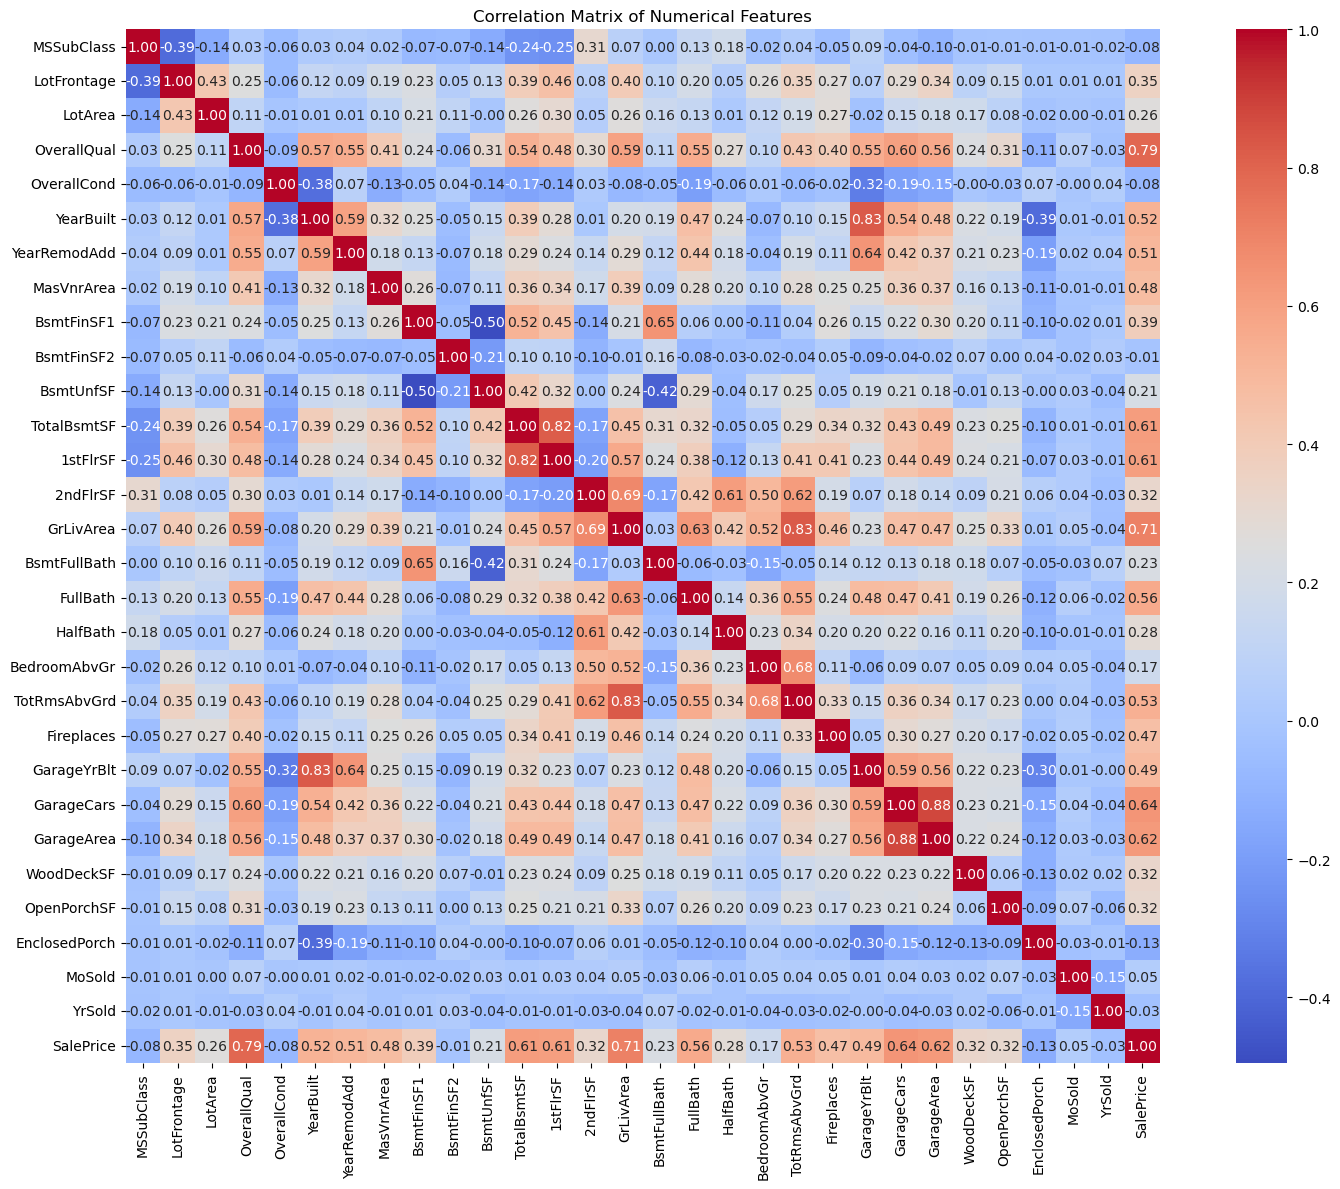

In [615]:
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [616]:
target_corr = corr_matrix['SalePrice'].drop('SalePrice')

## `Investigate features with low correlation with SalePrice`

In [617]:
weak_corr = target_corr[abs(target_corr) < 0.1]

# Display weakly correlated features
print("Weakly Correlated Features (|corr| < 0.1):")
print(weak_corr.sort_values())

Weakly Correlated Features (|corr| < 0.1):
MSSubClass    -0.084284
OverallCond   -0.077856
YrSold        -0.028923
BsmtFinSF2    -0.011378
MoSold         0.046432
Name: SalePrice, dtype: float64


In [618]:
strong_cols = list(set(numerical_cols) - set(weak_corr.index))

# Optional: sort for readability
strong_cols = sorted(strong_cols)

print("Numerical columns with meaningful correlation:")
print(strong_cols)

Numerical columns with meaningful correlation:
['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallQual', 'SalePrice', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd']


## `Selecting strong features for further modeling`

In [619]:
numerical_cols = strong_cols

# `Feature Engineering`

## `Combining FullBath and HalfBath into a single column and BsmtFullBath into Total_baths`

In [620]:
df['Total_baths'] = df['FullBath'] + df['HalfBath'] * 0.5 + df['BsmtFullBath']

In [621]:
baths_cols = ['FullBath', 'HalfBath', 'BsmtFullBath']

In [622]:
cols_left = list(set(numerical_cols) - set(baths_cols))

# Optional: sort for readability
cols_left = sorted(cols_left)

In [623]:
len(cols_left)

22

In [624]:
numerical_cols = cols_left
numerical_cols.append('Total_baths')

In [625]:
numerical_cols

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallQual',
 'SalePrice',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'YearBuilt',
 'YearRemodAdd',
 'Total_baths']

## `Calculating and comibining 1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF' into over_all_sf`

In [626]:
over_all_sf = ['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF']

In [627]:
cols_left = list(set(numerical_cols) - set(over_all_sf))

# Optional: sort for readability
cols_left = sorted(cols_left)


In [628]:
df['Overall_sf'] = df[over_all_sf].sum(axis=1)

In [629]:
numerical_cols = cols_left

In [630]:
numerical_cols.append('Overall_sf')

In [631]:
len(numerical_cols)

20

## `Investing Correlation matrix again after adding new features`

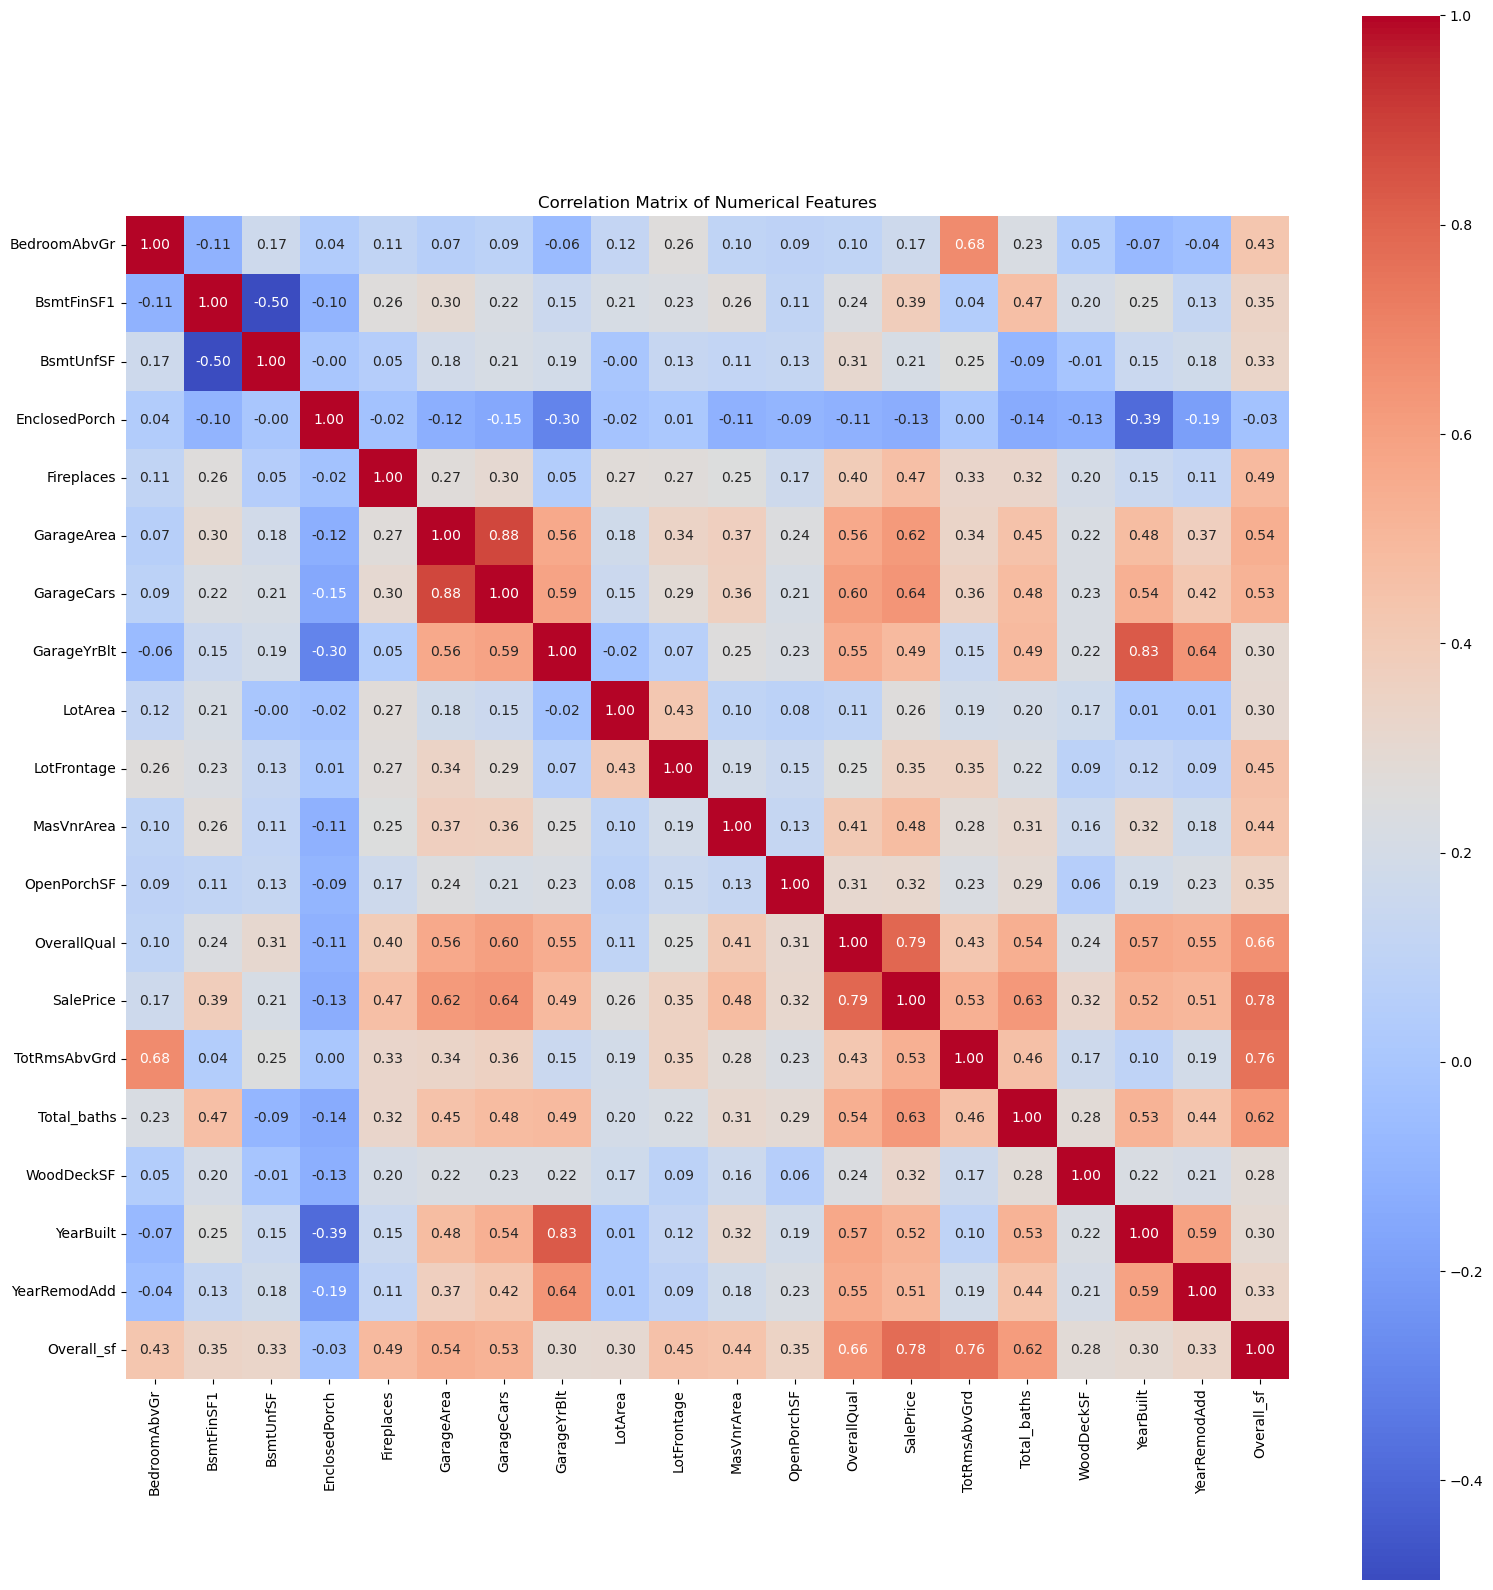

In [632]:
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## `Importing Simple Imputer for handling missing values`

In [633]:
from sklearn.impute import SimpleImputer

In [634]:
all_cols = numerical_cols + categorical_cols

In [635]:
df_imp = df[all_cols]

In [636]:
df_imp.shape

(1460, 46)

## `Performing train_test_split to obtain X_train,X_test,y_train,y_test`

In [637]:
from sklearn.model_selection import train_test_split

In [638]:
X_train, X_test, y_train, y_test = train_test_split(df_imp.drop(columns=['SalePrice']), df_imp['SalePrice'], test_size=0.2, random_state=42)

In [639]:
X_cols_numerical = list(set(numerical_cols) - set(['SalePrice']))

In [640]:
from sklearn.impute import SimpleImputer

## `Handling missing values for numerical Columns by filling mean values`

In [641]:
simple_imputer = SimpleImputer(strategy='mean')
import pandas as pd

# Fit on train, transform both, wrap as DataFrame
X_train[X_cols_numerical] = pd.DataFrame(
    simple_imputer.fit_transform(X_train[X_cols_numerical]),
    columns=X_cols_numerical,
    index=X_train.index
)

X_test[X_cols_numerical] = pd.DataFrame(
    simple_imputer.transform(X_test[X_cols_numerical]),
    columns=X_cols_numerical,
    index=X_test.index
)


## `Handling missing values for categorical Columns by filling most frequent values`

In [642]:
cat_simple_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = pd.DataFrame(
    cat_simple_imputer.fit_transform(X_train[categorical_cols]),
    columns=categorical_cols,
    index=X_train.index
)
X_test[categorical_cols] = pd.DataFrame(
    cat_simple_imputer.transform(X_test[categorical_cols]),
    columns=categorical_cols,
    index=X_test.index
)

In [643]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

## `Perform ordinal encoding on ordinal columns`

In [644]:
oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [645]:
X_train[ordinal_cols] = pd.DataFrame(
    oe.fit_transform(X_train[ordinal_cols]),
    columns=ordinal_cols,
    index=X_train.index
)
X_test[ordinal_cols] = pd.DataFrame(
    oe.transform(X_test[ordinal_cols]),
    columns=ordinal_cols,
    index=X_test.index
)

## `Perform one hot encoding on ohe columns`

In [646]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first')


In [647]:
# Transform and convert to DataFrame
X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[ohe_cols]),
    columns=ohe.get_feature_names_out(ohe_cols),
    index=X_train.index
)

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[ohe_cols]),
    columns=ohe.get_feature_names_out(ohe_cols),
    index=X_test.index
)

# Drop original categorical columns
X_train = X_train.drop(columns=ohe_cols)
X_test = X_test.drop(columns=ohe_cols)

# Concatenate the one-hot encoded features
X_train = pd.concat([X_train, X_train_ohe], axis=1)
X_test = pd.concat([X_test, X_test_ohe], axis=1)


# `Modeling`

## `Fiting Linear Regression` 

In [648]:
from sklearn.linear_model import LinearRegression

In [649]:
lr = LinearRegression()

In [650]:
lr.fit(X_train,y_train)

LinearRegression()

In [651]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## `R2 score and Mean Absolute Error`

In [652]:
r2_score(y_test, lr.predict(X_test)), mean_absolute_error(y_test, lr.predict(X_test))

(0.8489765114899042, 21236.352761137314)

## `Fiting Random Forest Regressor`

In [653]:
from sklearn.ensemble import RandomForestRegressor

In [654]:
rf = model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)


In [655]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=200, random_state=42)

## `R2 score and Mean Absolute Error`

In [656]:
r2_score(y_test, rf.predict(X_test)),mean_absolute_error(y_test, rf.predict(X_test))

(0.8219022142750851, 20211.989594282728)

## `Feature importances using Random Forest (Top 20 Features)`

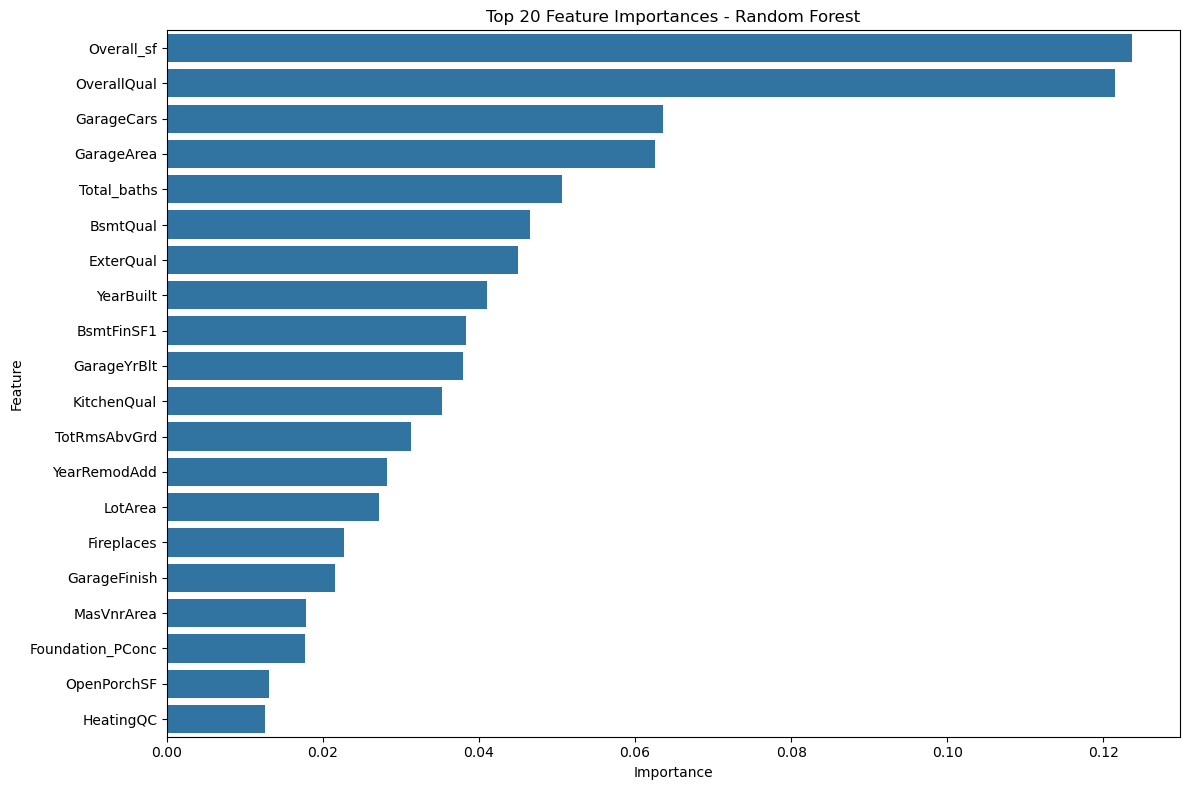

In [667]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importances from the Random Forest model
importances = rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame
feat_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_importances.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [726]:
imp_feature = feat_importances.head(150)['Feature'].tolist()
imp_feature

['Overall_sf',
 'OverallQual',
 'GarageCars',
 'GarageArea',
 'Total_baths',
 'BsmtQual',
 'ExterQual',
 'YearBuilt',
 'BsmtFinSF1',
 'GarageYrBlt',
 'KitchenQual',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'LotArea',
 'Fireplaces',
 'GarageFinish',
 'MasVnrArea',
 'Foundation_PConc',
 'OpenPorchSF',
 'HeatingQC',
 'LotFrontage',
 'BsmtFinType1_GLQ',
 'WoodDeckSF',
 'BsmtUnfSF',
 'BsmtExposure',
 'RoofStyle_Gable',
 'Neighborhood_NridgHt',
 'RoofStyle_Hip',
 'BedroomAbvGr',
 'Foundation_CBlock',
 'SaleCondition_Partial',
 'MSZoning',
 'Neighborhood_NoRidge',
 'SaleType_New',
 'GarageType_Detchd',
 'LotShape',
 'HouseStyle_2Story',
 'GarageType_Attchd',
 'Exterior1st_VinylSd',
 'BldgType',
 'Exterior2nd_VinylSd',
 'Neighborhood_Crawfor',
 'SaleType_WD',
 'BsmtFinType1_Unf',
 'Exterior1st_BrkFace',
 'GarageType_BuiltIn',
 'HouseStyle_1Story',
 'SaleCondition_Normal',
 'Neighborhood_Edwards',
 'LotConfig',
 'LandContour',
 'EnclosedPorch',
 'Exterior1st_MetalSd',
 'Neighborhood_NAmes',
 'Neighbo

## `Fiting XGBoost model on important features`

In [727]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    min_samples_split=4,
    min_samples_leaf=4,
    learning_rate=0.1,
    random_state=42
)
xgb1.fit(X_train[imp_feature], y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:36:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, min_samples_leaf=4,
             min_samples_split=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, ...)

## `R2 score and Mean Absolute Error`

In [728]:
r2_score(y_test, xgb1.predict(X_test[imp_feature])),mean_absolute_error(y_test, xgb1.predict(X_test[imp_feature]))

(0.8888630867004395, 17286.092211579624)

## `Fiting XGBoost `

In [657]:
from xgboost import XGBRegressor
xgb = XGBRegressor(
    n_estimators=300,
    max_depth=2,
    min_samples_split=10,
    min_samples_leaf=4,
    learning_rate=0.1,
    random_state=42
)
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:02:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, min_samples_leaf=4,
             min_samples_split=10, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, ...)

## `R2 score and Mean Absolute Error`

In [680]:
r2_score(y_test, xgb.predict(X_test)),mean_absolute_error(y_test, xgb.predict(X_test))

(0.8836493492126465, 17777.85855896832)

## `Fiting Gradient Boosting Regressor`

In [659]:
from sklearn.ensemble import GradientBoostingRegressor

In [660]:
gbr = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=.9, criterion='friedman_mse', min_samples_split=5, min_samples_leaf=6, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=.2, alpha=0.3, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.5)

In [661]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.3, ccp_alpha=0.5, max_features=0.2,
                          min_samples_leaf=6, min_samples_split=5,
                          subsample=0.9)

## `R2 score and Mean Absolute Error`

In [663]:
r2_score(y_test, gbr.predict(X_test)),mean_absolute_error(y_test, gbr.predict(X_test))


(0.8929268336939769, 17456.706898866672)

# `Conclusion`

---

## `Project Goal`
The goal of this project was to **predict house sale prices** in Ames, Iowa using machine learning models, and to identify the best-performing model based on key evaluation metrics: **R² score** and **Mean Absolute Error (MAE)**.

---

## `About the Dataset`
- The **Ames Housing dataset** contains **1,460 observations** of residential homes sold between 2006 and 2010.
- It includes **80+ features** spanning property details, location, construction quality, and more.
- The target variable was `SalePrice`, which was **log-transformed** during modeling to reduce skew and stabilize variance.

---

## `Models Used and Performance Summary`

| Model                                   | R² Score (Test) | MAE (Test)       | Notes                                              |
|----------------------------------------|------------------|------------------|----------------------------------------------------|
| **Linear Regression**                  | 0.849            | \$21,236         | Strong baseline, simple & interpretable            |
| **Random Forest**                      | 0.822            | \$20,212         | Good, but slightly overfit; less accurate on test  |
| **XGBoost Regressor (all features)**   | 0.884            | \$17,778         | Very strong — robust and high-performing           |
| **XGBoost (top 150 RF features)**      | 0.889            | **\$17,286**     | `Best balance` — improved after feature selection |
| **Gradient Boosting**                  | **0.893**        | \$17,457         | Excellent — highest R², nearly best MAE            |

---

## `Final Takeaways`

- **Feature engineering** (e.g., log-transforming `SalePrice`) significantly improved model performance.
- **XGBoost using the top 150 features** from Random Forest provided the **best overall performance**, achieving a near-optimal balance of R² and MAE.
- **Gradient Boosting** achieved the **highest R²**, suggesting excellent generalization.
- Simple **Linear Regression** served as a strong baseline despite its simplicity.

---

## `Next Steps`

- Tune hyperparameters further using `GridSearchCV` or `Optuna`.
- Apply SHAP or permutation importance to interpret feature contributions.
- Package the final model into a web service or API for deployment using Flask or Streamlit.

---

